In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
import pytse_client as tse
import tensorflow as tf
import seaborn as sns
from timeit import default_timer as timer
from keras.layers import LSTM, Dense, Dropout,Convolution1D, Activation, MaxPooling1D, Flatten,Input
from keras.models import Model, Sequential, load_model
from matplotlib.pylab import rcParams
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error
from math import sqrt
import math
from tensorflow.keras import layers
from keras.callbacks import TensorBoard
from time import time
from tqdm.keras import TqdmCallback

In [2]:
Petro=pd.read_csv('tickers_data/شپنا1.csv')
display(Petro)

,date,open,high,low,adjClose,Profitability of the company,Number of Trade,count,close,p/e
0,2009-01-03,3019.0,3108.0,3019.0,3054.0,2529129192,817996,160,3105.0,12.60
1,2009-01-04,3143.0,3145.0,3139.0,3101.0,2695139463,857029,143,3145.0,12.60
2,2009-01-05,3194.0,3194.0,3194.0,3117.0,919721882,287953,51,3194.0,12.60
3,2009-01-10,3210.0,3210.0,3210.0,3132.0,846798000,263800,48,3210.0,12.60
4,2009-01-11,3225.0,3225.0,3225.0,3132.0,8688150,2694,2,3225.0,12.60
...,...,...,...,...,...,...,...,...,...,...
1921,2019-12-25,5751.0,5751.0,5658.0,5690.0,119716953949,21041362,3498,5702.0,11.12
1922,2019-12-28,5720.0,5790.0,5688.0,5747.0,157352963951,27382126,4563,5725.0,11.12
1923,2019-12-29,5732.0,5779.0,5670.0,5720.0,114783143323,20067820,3772,5757.0,11.12
1924,2019-12-30,5760.0,6006.0,5700.0,5928.0,330580334263,55766414,8691,5899.0,11.12


In [3]:
#astype date in first code
S=Petro.iloc[:, 0:1]
S1=pd.DataFrame(S)
display(S1.dtypes)
S1['date'] = S1['date'].astype('datetime64[ns]')
S1

date    object
dtype: object

,date
0,2009-01-03
1,2009-01-04
2,2009-01-05
3,2009-01-10
4,2009-01-11
...,...
1921,2019-12-25
1922,2019-12-28
1923,2019-12-29
1924,2019-12-30


In [ ]:
#first code
to_drop=['date','high','low','Profitability of the company','Number of Trade','adjClose','count','close','p/e']
Petro.drop(to_drop,inplace=True, axis=1)
Petro.head()
Petro.tail()
display(Petro)
#Normalise open data
Petro_Norm = (Petro - Petro.min())/(Petro.max() - Petro.min())
print(Petro_Norm.head(1926))
print(Petro_Norm.min())
print(Petro_Norm.max())
# join datas
joinPetro=S1.join(Petro_Norm, lsuffix="_left", rsuffix="_right")
joinPetro
#save data
joinPetro.to_csv('data/final_PetroOpen.csv')

In [ ]:
#second code
Ind2 = pd.read_csv('tickers_data/final_PetroOpen.csv')
Ind2.head()

In [ ]:
to_drop1=['date','open','low','Profitability of the company','Number of Trade','adjClose','count','close','p/e']
Petro.drop(to_drop1,inplace=True, axis=1)
Petro.head()
Petro.tail()
display(Petro)
#Normalise high
Petro_Norm = (Petro - Petro.min())/(Petro.max() - Petro.min())
print(Petro_Norm.head(1926))
print(Petro_Norm.min())
print(Petro_Norm.max())
#join data
joinPetro=Ind2.join(Petro_Norm, lsuffix="_left", rsuffix="_right")
joinPetro
#Drop number
to_drop1=['Unnamed: 0']
joinPetro.drop(to_drop1,inplace=True, axis=1)
joinPetro.head()
joinPetro.tail()
display(joinPetro)
#save data
joinPetro.to_csv('data/final_PetroHigh.csv')

In [ ]:
#third code
Ind2 = pd.read_csv('tickers_data/final_PetroHigh.csv')
Ind2.head()

In [ ]:
to_drop1=['date','open', 'high', 'Profitability of the company', 'Number of Trade', 'adjClose','count','close','p/e']
Petro.drop(to_drop1,inplace=True, axis=1)
Petro.head()
Petro.tail()
display(Petro)
#Normalise high
Petro_Norm = (Petro - Petro.min())/(Petro.max() - Petro.min())
print(Petro_Norm.head(1926))
print(Petro_Norm.min())
print(Petro_Norm.max())
#join data
joinPetro=Ind2.join(Petro_Norm, lsuffix="_left", rsuffix="_right")
joinPetro
#Drop number
to_drop1=['Unnamed: 0']
joinPetro.drop(to_drop1,inplace=True, axis=1)
joinPetro.head()
joinPetro.tail()
display(joinPetro)
#save data
joinPetro.to_csv('data/final_PetroLow.csv')

In [ ]:
#forth code
Ind2 = pd.read_csv('tickers_data/final_Indlow.csv')
Ind2.head()

In [ ]:
to_drop1=['date','open', 'high', 'low','Number of Trade','adjClose','count','close','p/e']
Petro.drop(to_drop1,inplace=True, axis=1)
Petro.head()
Petro.tail()
display(Petro)
#Normalise high
Petro_Norm = (Petro - Petro.min())/(Petro.max() - Petro.min())
print(Petro_Norm.head(1926))
print(Petro_Norm.min())
print(Petro_Norm.max())
#join data
joinPetro=Ind2.join(Petro_Norm, lsuffix="_left", rsuffix="_right")
joinPetro
#Drop number
to_drop1=['Unnamed: 0']
joinPetro.drop(to_drop1,inplace=True, axis=1)
joinPetro.head()
joinPetro.tail()
display(joinPetro)
#save data
joinPetro.to_csv('data/final_PetroProfitability of the company.csv')

In [ ]:
#fifth code
Ind2 = pd.read_csv('tickers_data/final_PetroProfitability of the company.csv')
Ind2.head()

In [ ]:
to_drop1=['date','open', 'high', 'low','Profitability of the company','adjClose','count','close','p/e']
Petro.drop(to_drop1,inplace=True, axis=1)
Petro.head()
Petro.tail()
display(Petro)
#Normalise high
Petro_Norm = (Petro - Petro.min())/(Petro.max() - Petro.min())
print(Petro_Norm.head())
print(Petro_Norm.min())
print(Petro_Norm.max())
#join data
joinPetro=Ind2.join(Petro_Norm, lsuffix="_left", rsuffix="_right")
joinPetro
#Drop number
to_drop1=['Unnamed: 0']
joinPetro.drop(to_drop1,inplace=True, axis=1)
joinPetro.head()
joinPetro.tail()
display(joinPetro)
#save data
joinPetro.to_csv('data/final_PetroNumber of Trade.csv')

In [ ]:
#sixth code
Ind2 = pd.read_csv('tickers_data/final_PetroNumber of Trade.csv')
Ind2.head()

In [ ]:
to_drop1=['date','open', 'high', 'low','Profitability of the company','adjClose','count','Number of Trade','p/e']
Petro.drop(to_drop1,inplace=True, axis=1)
Petro.head()
Petro.tail()
display(Petro)
#Normalise high
Petro_Norm = (Petro - Petro.min())/(Petro.max() - Petro.min())
print(Petro_Norm.head())
print(Petro_Norm.min())
print(Petro_Norm.max())
#join data
joinPetro=Ind2.join(Petro_Norm, lsuffix="_left", rsuffix="_right")
joinPetro
#Drop number
to_drop1=['Unnamed: 0']
joinPetro.drop(to_drop1,inplace=True, axis=1)
joinPetro.head()
joinPetro.tail()
display(joinPetro)
#save data
joinPetro.to_csv('data/final_PetroClose.csv')

In [5]:
#seventh code
Ind2 = pd.read_csv('tickers_data/final_PetroClose.csv')
Ind2.head()

,Unnamed: 0,date,open,high,low,Profitability of the company,Number of Trade,close
0,0,2009-01-03,0.165009,0.171439,0.175655,0.001566,0.005034,0.034184
1,1,2009-01-04,0.177087,0.176774,0.188758,0.001668,0.005274,0.035329
2,2,2009-01-05,0.179574,0.178552,0.190847,0.000569,0.001772,0.036732
3,3,2009-01-10,0.179396,0.179797,0.182112,0.000524,0.001623,0.037190
4,4,2009-01-11,0.167318,0.170550,0.173376,0.000005,0.000017,0.037619


In [ ]:
to_drop1=['date','open', 'high', 'low','Profitability of the company','adjClose','count','Number of Trade','close']
Petro.drop(to_drop1,inplace=True, axis=1)
Petro.head()
Petro.tail()
display(Petro)
#Normalise high
Petro_Norm = (Petro - Petro.min())/(Petro.max() - Petro.min())
print(Petro_Norm.head())
print(Petro_Norm.min())
print(Petro_Norm.max())
#join data
joinPetro=Ind2.join(Petro_Norm, lsuffix="_left", rsuffix="_right")
joinPetro
#Drop number
to_drop1=['Unnamed: 0']
joinPetro.drop(to_drop1,inplace=True, axis=1)
joinPetro.head()
joinPetro.tail()
display(joinPetro)
#save data
joinPetro.to_csv('data/final_PetroPE.csv')

In [ ]:
Ind2 = pd.read_csv('tickers_data/finalPetroJoin5_data.csv')
Ind2.head()

In [ ]:
to_drop1=['number']

In [ ]:
Ind2.drop(to_drop1,inplace=True, axis=1)
Ind2.head()
Ind2.tail()
display(Ind2)

In [ ]:
Petro.to_csv('data/final_شپنا1.csv')

In [3]:
# load train data in third code
Petro_train=pd.read_csv('tickers_data/شپنا1_train.csv')
Petro_train.shape

(1348, 9)

In [4]:
to_drop1=['number']
Petro_train.drop(to_drop1,inplace=True, axis=1)
Petro_train.head()

NameError: name 'Petro_train' is not defined

In [5]:
#choose train data in third code
training_set = Petro_train.iloc[:, 2:3].values

In [6]:
#normalization data in third code
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
#split x, y train in third code
X_train = []
y_train = []
for i in range(21, 1348):
    X_train.append(training_set_scaled[i-21:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
#reshape x train in third code
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
display(training_set_scaled)
training_set_scaled.max()
training_set_scaled.min()

array([[0.03385461],
       [0.03491436],
       [0.03631781],
       ...,
       [0.0335682 ],
       [0.03265166],
       [0.03216475]])

0.0

In [10]:
#read test data third
Petro_test=pd.read_csv('tickers_data/شپنا1_test.csv')
Petro_test.shape

(578, 9)

In [ ]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(y_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [11]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
34/34 [==============================] - 24s 250ms/step - loss: 0.0436 - mse: 0.0436 - mae: 0.1297 - mape: 187350.3522 - val_loss: 1.1503e-04 - val_mse: 1.1503e-04 - val_mae: 0.0097 - val_mape: 44.1370
Epoch 2/10
34/34 [==============================] - 3s 96ms/step - loss: 0.0208 - mse: 0.0208 - mae: 0.0754 - mape: 13333.6020 - val_loss: 8.5828e-04 - val_mse: 8.5828e-04 - val_mae: 0.0287 - val_mape: 122.1423
Epoch 3/10
34/34 [==============================] - 3s 91ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0772 - mape: 2593.9931 - val_loss: 1.5368e-04 - val_mse: 1.5368e-04 - val_mae: 0.0108 - val_mape: 43.2332
Epoch 4/10
34/34 [==============================] - 3s 92ms/step - loss: 0.0132 - mse: 0.0132 - mae: 0.0608 - mape: 1546.9324 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0347 - val_mape: 147.7698
Epoch 5/10
34/34 [==============================] - 3s 100ms/step - loss: 0.0123 - mse: 0.0123 - mae: 0.0598 - mape: 57122.2726 - val_loss: 1.0517e-04 - val_mse: 1.0

In [ ]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 20
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [15]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
34/34 [==============================] - 30s 269ms/step - loss: 0.0580 - mse: 0.0580 - mae: 0.1536 - mape: 105550.6218 - val_loss: 6.6280e-04 - val_mse: 6.6280e-04 - val_mae: 0.0252 - val_mape: 109.3895
Epoch 2/10
34/34 [==============================] - 4s 131ms/step - loss: 0.0300 - mse: 0.0300 - mae: 0.0901 - mape: 10329.2421 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0350 - val_mape: 143.0348
Epoch 3/10
34/34 [==============================] - 4s 128ms/step - loss: 0.0178 - mse: 0.0178 - mae: 0.0749 - mape: 116115.1074 - val_loss: 3.6946e-05 - val_mse: 3.6946e-05 - val_mae: 0.0050 - val_mape: 21.7152
Epoch 4/10
34/34 [==============================] - 4s 126ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.0627 - mape: 27996.0170 - val_loss: 4.5440e-04 - val_mse: 4.5440e-04 - val_mae: 0.0206 - val_mape: 90.0336
Epoch 5/10
34/34 [==============================] - 4s 126ms/step - loss: 0.0179 - mse: 0.0179 - mae: 0.0685 - mape: 3427.6958 - val_loss: 1.6128e-04 - val_mse

In [ ]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [17]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
34/34 [==============================] - 33s 288ms/step - loss: 0.0740 - mse: 0.0740 - mae: 0.1648 - mape: 6887.0313 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0405 - val_mape: 172.6579
Epoch 2/10
34/34 [==============================] - 5s 141ms/step - loss: 0.0248 - mse: 0.0248 - mae: 0.0845 - mape: 385.7990 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0375 - val_mape: 161.3310
Epoch 3/10
34/34 [==============================] - 5s 138ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.0728 - mape: 36514.4791 - val_loss: 8.4397e-04 - val_mse: 8.4397e-04 - val_mae: 0.0285 - val_mape: 123.4156
Epoch 4/10
34/34 [==============================] - 5s 137ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.0717 - mape: 2645.4342 - val_loss: 9.3088e-05 - val_mse: 9.3088e-05 - val_mae: 0.0085 - val_mape: 37.7174
Epoch 5/10
34/34 [==============================] - 5s 137ms/step - loss: 0.0170 - mse: 0.0170 - mae: 0.0666 - mape: 26932.5015 - val_loss: 3.4494e-05 - val_mse: 3.4494e-05

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [19]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
34/34 [==============================] - 37s 345ms/step - loss: 0.0670 - mse: 0.0670 - mae: 0.1680 - mape: 70018.7112 - val_loss: 0.0023 - val_mse: 0.0023 - val_mae: 0.0478 - val_mape: 204.2973
Epoch 2/10
34/34 [==============================] - 6s 172ms/step - loss: 0.0254 - mse: 0.0254 - mae: 0.0812 - mape: 37981.4499 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0325 - val_mape: 140.3790
Epoch 3/10
34/34 [==============================] - 6s 167ms/step - loss: 0.0158 - mse: 0.0158 - mae: 0.0627 - mape: 69042.5785 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0409 - val_mape: 175.3158
Epoch 4/10
34/34 [==============================] - 6s 166ms/step - loss: 0.0163 - mse: 0.0163 - mae: 0.0672 - mape: 14719.5623 - val_loss: 5.7811e-05 - val_mse: 5.7811e-05 - val_mae: 0.0064 - val_mape: 28.5742
Epoch 5/10
34/34 [==============================] - 6s 166ms/step - loss: 0.0192 - mse: 0.0192 - mae: 0.0670 - mape: 18965.7987 - val_loss: 8.0334e-04 - val_mse: 8.0334e-04 - v

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [13]:
to_drop1=['number']
Petro_test.drop(to_drop1,inplace=True, axis=1)
Petro_test.head()

,date,open,high,low,value,volume,close,p/e
0,2017-06-19,2981.0,2998.0,2862.0,10116816498,3446271,2913.0,11.52
1,2017-06-20,2880.0,2945.0,2871.0,4698375727,1616940,2871.0,11.52
2,2017-06-21,2923.0,2930.0,2824.0,7909119385,2771293,2830.0,11.52
3,2017-06-24,2811.0,2887.0,2801.0,6117707094,2164294,2815.0,11.52
4,2017-06-25,2830.0,2900.0,2820.0,7671408414,2680168,2860.0,11.52


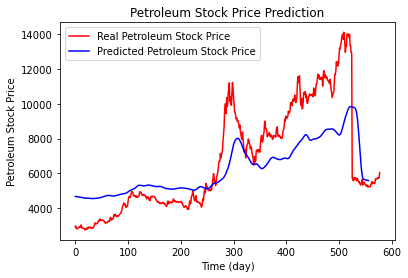

In [20]:
#third code
y_test=[]
real_stock_price = Petro_test.iloc[:, 1:2].values
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc1.fit_transform(real_stock_price)

# Getting the predicted stock price of 2017
# We need 60 previous inputs for each day of the Test_set in 2017
# Combine 'dataset_train' and 'dataset_test'
# 'axis = 0' for Vertical Concatenation to add rows to the bottom
dataset_total = pd.concat((Petro_train['close'],Petro_test['close']), axis = 0)
# Extract Stock Prices for Test time period, plus 60 days previous
inputs = dataset_total[len(dataset_total) - len(Petro_test) - 21:].values
# 'reshape' function to get it into a NumPy format
inputs = inputs.reshape(-1,1)
# Inputs need to be scaled to match the model trained on Scaled Feature
inputs = sc.transform(inputs)
# The following is pasted from above and modified for Testing, romove all 'Ys'
X_test = []

for i in range(21, 578 ):
    X_test.append(inputs[i-21:i, 0])
    y_test.append(inputs[i, 0])

X_test = np.array(X_test)
# We need a 3D input so add another dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Predict the Stock Price
predicted_stock_price = model.predict(X_test)
# We need to inverse the scaling of our prediction to get a Dollar amount
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Petroleum Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Petroleum Stock Price')
plt.title('Petroleum Stock Price Prediction')
plt.xlabel('Time (day)')
plt.ylabel('Petroleum Stock Price')
plt.legend()
plt.show()